# Assignment - 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

1. Find the Fourier series associated with the function

                         f(x) = 0,     −π ≤ x < 0
                                π − x,  0 ≤ x ≤ π                             ................(1)
                                
   Write a function to determine the coefficients a0, an, and bn. Plot the magnitude of the coefficients with |an| in blue colour and |bn| in red colour.

In [2]:
def A_o(x,LL,UL):
    T = 2*(UL - LL)
    f = 2*(np.pi-x)/T
    return f

In [3]:
def A_o_Integration(LL,UL):
    I = quad(A_o,LL,UL,args=(LL,UL))
    return I[0]

In [4]:
def A_n(x,n,LL,UL):
    T = 2*(UL - LL)
    f = 2*(np.pi-x)*np.cos(2*np.pi*n*x/T)/T
    return f

In [5]:
def A_n_Integration(n,LL,UL):
    I = quad(A_n,LL,UL,args=(n,LL,UL))
    return I[0]

In [6]:
def B_n(x,n,LL,UL):
    T = 2*(UL - LL)
    f = 2*(np.pi-x)*np.sin(2*np.pi*n*x/(2*T))/T
    return f

In [7]:
def B_n_Integration(n,LL,UL):
    I = quad(B_n,LL,UL,args=(n,LL,UL))
    return I[0]

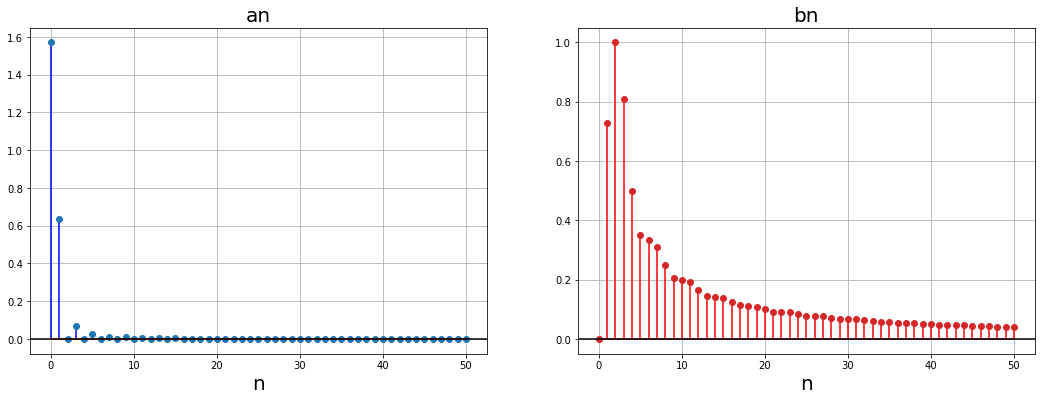

In [8]:
fig, axes = plt.subplots(1,2,figsize=(18,6))

n = np.arange(0,51,1)
LL = 0
UL = np.pi

a_n = []
for i in n:
    if i == 0:
        a_n.append(A_o_Integration(LL,UL))
    else:
        a_n.append(A_n_Integration(i,LL,UL))
a_n_abs = np.absolute(a_n)
axes[0].stem(n,a_n_abs,linefmt='blue', markerfmt='C0o')
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('an',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()

b_n = []
for i in n:
    b_n.append(B_n_Integration(i,LL,UL))
b_n = np.absolute(b_n)
axes[1].stem(n,b_n,linefmt='red', markerfmt='C3o')
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_title('bn',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].grid()

2. The saw-tooth wave f

   (a) For the saw-tooth wave f, compute the Fourier series on the interval [-1,1]. Plot the magnitude of the coefficients.

In [9]:
def sawtooth_ao(x,LL,UL):
    T = UL - LL
    if x>=-1 and x<0:
        f = ((2*x)+1)/T
    elif x>=0 and x<=1:
        f = ((-2*x)+1)/T
    else:
        f = 0
    return f

In [10]:
def Integration_ao(LL,UL):
    I = quad(sawtooth_ao,LL,UL,args=(LL,UL))
    return I[0]

In [11]:
def sawtooth_an(x,n,LL,UL):
    T = UL - LL
    if x>=-1 and x<0:
        f = 2*((2*x)+1)*np.cos(2*np.pi*n*x/T)/T
    elif x>=0 and x<=1:
        f = 2*((-2*x)+1)*np.cos(2*np.pi*n*x/T)/T
    else:
        f = 0
    return f

In [12]:
def Integration_an(n,LL,UL):
    I = quad(sawtooth_an,LL,UL,args=(n,LL,UL))
    return I[0]

In [13]:
def sawtooth_bn(x,n,LL,UL):
    T = UL - LL
    if x>=-1 and x<0:
        f = 2*((2*x)+1)*np.sin(2*np.pi*n*x/T)/T
    elif x>=0 and x<=1:
        f = 2*((-2*x)+1)*np.sin(2*np.pi*n*x/T)/T
    else:
        f = 0
    return f

In [14]:
def Integration_bn(n,LL,UL):
    I = quad(sawtooth_bn,LL,UL,args=(n,LL,UL))
    return I[0]

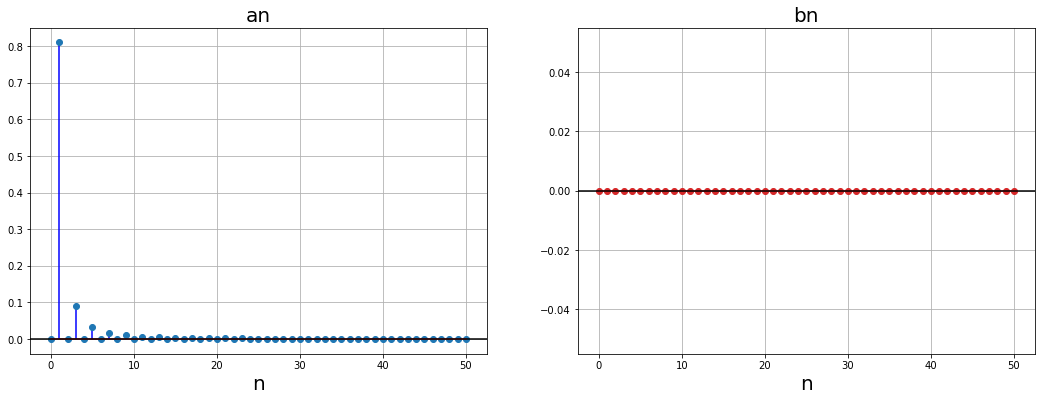

In [15]:
fig, axes = plt.subplots(1,2,figsize=(18,6))
n = np.arange(0,51,1)
LL = -1
UL = 1

sawtooth_An = []
for i in n:
    if i == 0:
        sawtooth_An.append(Integration_ao(LL,UL))
    else:
        sawtooth_An.append(Integration_an(i,LL,UL))
sawtooth_An_abs = np.absolute(sawtooth_An)
axes[0].stem(n,sawtooth_An_abs,linefmt='blue', markerfmt='C0o')
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('an',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()


sawtooth_Bn = []
for i in n:
    sawtooth_Bn.append(Integration_bn(i,LL,UL))
sawtooth_Bn_abs = np.absolute(sawtooth_Bn)
axes[1].stem(n,sawtooth_Bn_abs,linefmt='red', markerfmt='C3o')
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_title('bn',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].grid()

(b) For the Fourier series expression in (a), plot the partial sum of order 3 with red colour and the original saw-tooth wave f with blue colour. Compare the results on the same plot.

In [16]:
def sawtooth(x):
    f = []
    for i in x:
        if i>=-1 and i<0:
            f.append((2*i)+1)
        elif i>=0 and i<=1:
            f.append((-2*i)+1)
        else:
            f.append(0)
    return f

In [17]:
def sine_1(x,n,LL,UL):
    T = UL - LL
    f = np.sin(2*np.pi*n*x/T)
    return f

In [18]:
def cosine_1(x,n,LL,UL):
    T = UL - LL
    f = np.cos(2*np.pi*n*x/T)
    return f

In [19]:
def fourier_series(x,n,LL,UL):
    fs = 0
    for i in range(0,n+1):
        if i==0:
            fs+=sawtooth_An[i]/2
        else:
            fs+=((sawtooth_An[i]*cosine_1(x,i,LL,UL))+(sawtooth_Bn[i]*sine_1(x,i,LL,UL)))
    return fs

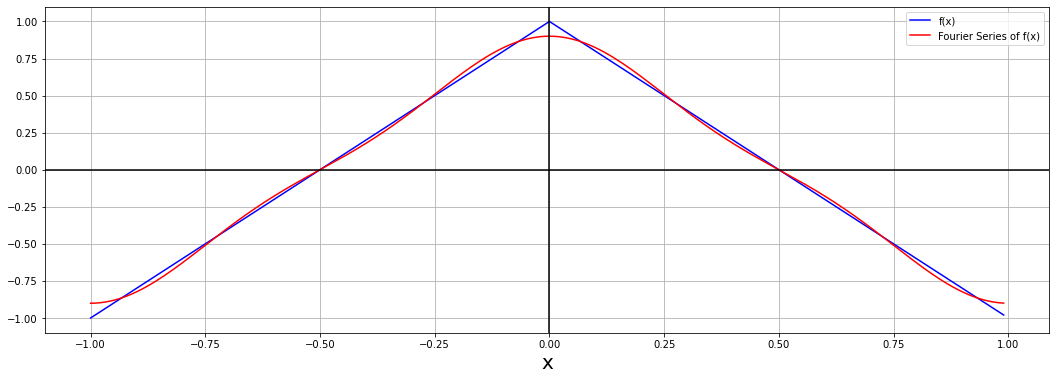

In [20]:
plt.subplots(figsize=(18,6))
n = 3
LL = -1
UL = 1
x = np.arange(LL,UL,0.01)

output = sawtooth(x)
plt.plot(x,output,'b',label='f(x)')

out = fourier_series(x,n,LL,UL)
plt.plot(x,out,'r',label='Fourier Series of f(x)')

plt.xlabel('x',fontsize=20)
plt.axhline(color = "Black")
plt.axvline(color = "Black")
plt.grid()
plt.legend()

(c) Plot the partial sum of order 9 for the saw-tooth function with green colour and the original saw-tooth wave f with blue colour. The plots obtained for (b) and (c) must be shown in different subplotsand you should be able to explain your observation.

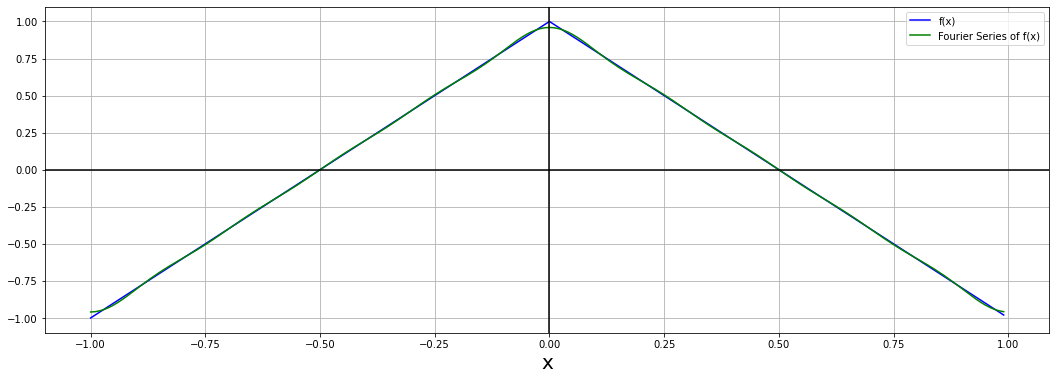

In [21]:
plt.subplots(figsize=(18,6))

n = 9
LL = -1
UL = 1
x = np.arange(LL,UL,0.01)

output = sawtooth(x)
plt.plot(x,output,'b',label='f(x)')

out = fourier_series(x,n,LL,UL)
plt.plot(x,out,'g',label='Fourier Series of f(x)')

plt.xlabel('x',fontsize=20)
plt.axhline(color = "Black")
plt.axvline(color = "Black")
plt.grid()
plt.legend()

3. The Fourier transform is given by

                                X(ω) = ∫ x(t) e−jωt dt             ...................(2)

   Write your custom function which takes input from the below given signals and computes the magnitude and phase spectra (a > 0). Sketch x(t), |X(ω)|, and ∠X(ω) when A = 2 and a = 4.

(a)

                         x(t) = A*e-at,  t ≥ 0
                                0,       t < 0                             ................(3)

In [22]:
def x1(t):
    f = []
    for i in t:
        if i>=0:
            f.append(A*np.exp(-a*i))
        else:
            f.append(0)
    return f

In [23]:
def x1_real(t,A,a,omega):
    if (t>0):
        return A*np.exp(-a*t)*np.cos(omega*t)
    else:
        return 0

In [24]:
def x1_real_integration(A,a,omega,LL,UL):
    I = quad(x1_real,LL,UL,args=(A,a,omega))
    return I[0]

In [25]:
def x1_imag(t,A,a,omega):
    if (t>0):
        return A*np.exp(-a*t)*np.sin(omega*t)
    else:
        return 0

In [26]:
def x1_imag_integration(A,a,omega,LL,UL):
    I = quad(x1_imag,LL,UL,args=(A,a,omega))
    return I[0]

In [29]:
A = 2
a = 4
LL = 0
UL = np.inf
omega = np.arange(-40,40,0.01)
x1_Real = []
x1_Imag = []
for i in omega:
    x1_Real.append(x1_real_integration(A,a,i,LL,UL))
    x1_Imag.append(x1_imag_integration(A,a,i,LL,UL))

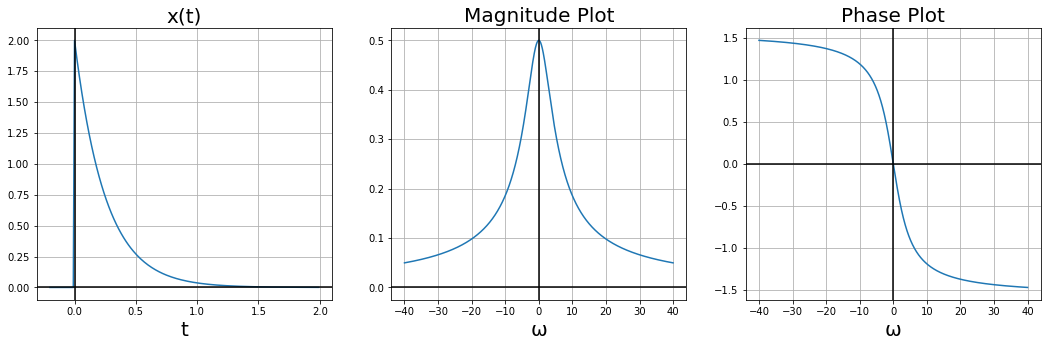

In [30]:
fig, axes = plt.subplots(1,3,figsize=(18,5))

t = np.arange(-0.2,2,0.01)
X1 = x1(t)
axes[0].plot(t,X1)
axes[0].set_xlabel('t',fontsize=20)
axes[0].set_title('x(t)',fontsize=20)
axes[0].axhline(color = "Black")
axes[0].axvline(color = "Black")
axes[0].grid()


x1_mag = np.absolute((np.array(x1_Real)) - 1j*(np.array(x1_Imag)))
axes[1].plot(omega,x1_mag)
axes[1].set_xlabel('ω',fontsize=20)
axes[1].set_title('Magnitude Plot',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].axvline(color = "Black")
axes[1].grid()


x1_phase = np.angle((np.array(x1_Real)) - 1j*(np.array(x1_Imag)))
axes[2].plot(omega,x1_phase)
axes[2].set_xlabel('ω',fontsize=20)
axes[2].set_title('Phase Plot',fontsize=20)
axes[2].axhline(color = "Black")
axes[2].axvline(color = "Black")
axes[2].grid()

(b)

                         x(t) =  A*e^(−a|t|)                                       .............(4)

In [31]:
def x2(t):
    f = []
    for i in t:
        f.append(A*np.exp(-a*abs(i)))
    return f

In [32]:
def x2_real(t,A,a,omega):
    f = A*np.exp(-a*abs(t))*np.cos(omega*t)
    return f

In [33]:
def x2_real_integration(A,a,omega,LL,UL):
    I = quad(x2_real,LL,UL,args=(A,a,omega))
    return I[0]

In [34]:
def x2_imag(t,A,a,omega):
    f = A*np.exp(-a*abs(t))*np.sin(omega*t)
    return f

In [35]:
def x2_imag_integration(A,a,omega,LL,UL):
    I = quad(x2_imag,LL,UL,args=(A,a,omega))
    return I[0]

In [36]:
A = 2
a = 4
LL = -np.inf
UL = np.inf
omega = np.arange(-10,10,0.01)
x2_Real = []
x2_Imag = []
for i in omega:
    x2_Real.append(x2_real_integration(A,a,i,LL,UL))
    x2_Imag.append(x2_imag_integration(A,a,i,LL,UL))

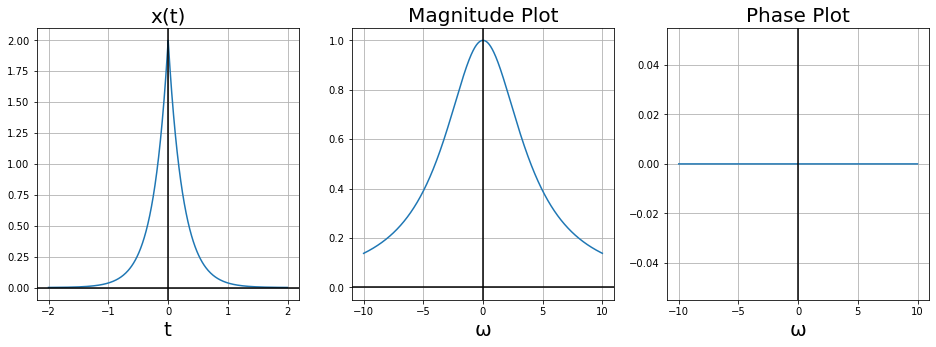

In [37]:
fig, axes = plt.subplots(1,3,figsize=(16,5))

t = np.arange(-2,2,0.01)
X2 = x2(t)
axes[0].plot(t,X2)
axes[0].set_xlabel('t',fontsize=20)
axes[0].set_title('x(t)',fontsize=20)
axes[0].axhline(color = "Black")
axes[0].axvline(color = "Black")
axes[0].grid()


x2_mag = np.absolute((np.array(x2_Real)) - 1j*(np.array(x2_Imag)))
axes[1].plot(omega,x2_mag)
axes[1].set_xlabel('ω',fontsize=20)
axes[1].set_title('Magnitude Plot',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].axvline(color = "Black")
axes[1].grid()


x2_phase = np.angle((np.array(x2_Real)) - 1j*(np.array(x2_Imag)))
axes[2].plot(omega,x2_phase)
axes[2].set_xlabel('ω',fontsize=20)
axes[2].set_title('Phase Plot',fontsize=20)
axes[2].axvline(color = "Black")
axes[2].grid()

4. Determine and sketch XR(ω), XI (ω), |X(ω)|, and ∠X(ω) for the Fourier transform:

                                 X(ω) = 1/(1 − ae−jω) , −1 ≤ a ≤ 1       .................(5)

   Show the graphical representation of the spectra for a = 0.8

In [38]:
def fn(a,omega):
    f = 1/(1 -(a*np.exp(-1j*omega)))
    return f

In [39]:
a = 0.8
omega = np.arange(-5,5,0.01)
X = fn(a,omega)

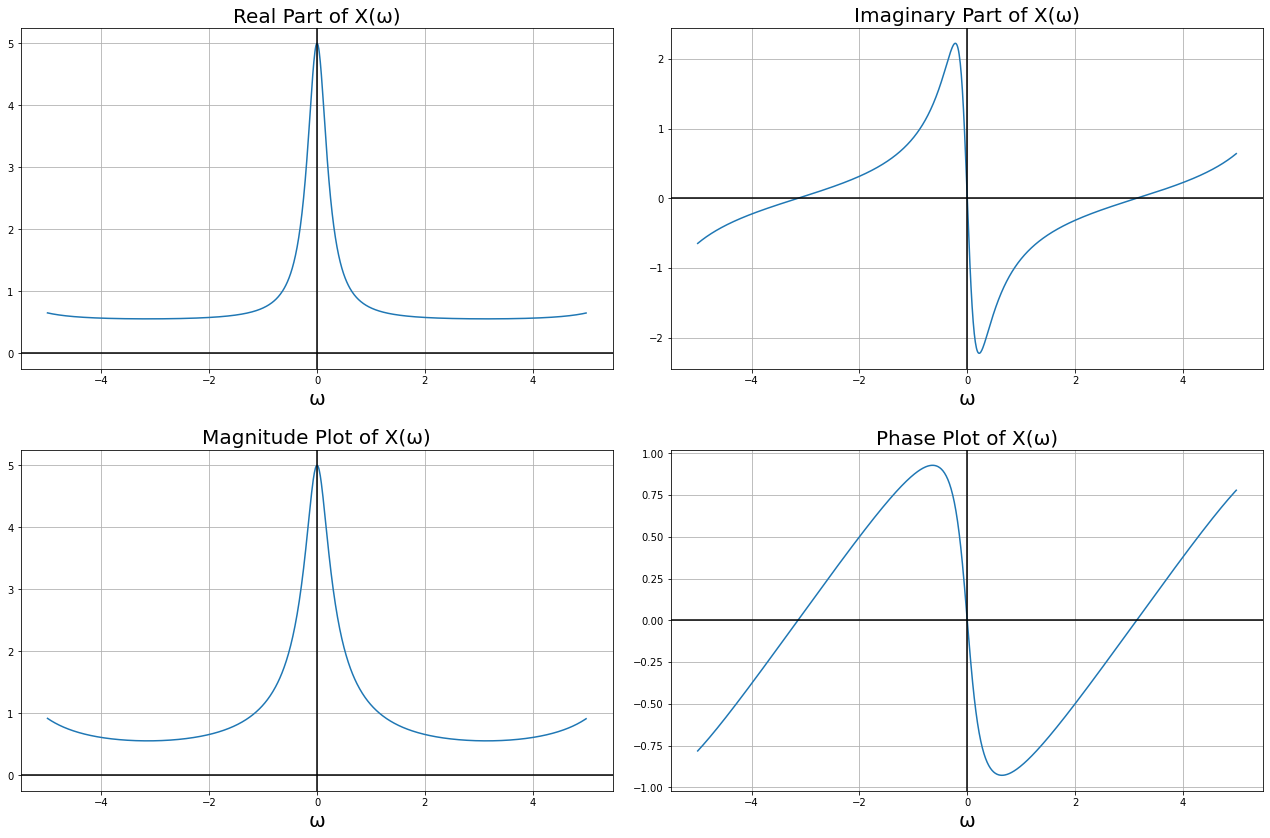

In [40]:
fig,axes = plt.subplots(2,2,figsize=(18,12))

X_R = X.real
axes[0,0].plot(omega,X_R)
axes[0,0].set_xlabel('ω',fontsize=20)
axes[0,0].set_title('Real Part of X(ω)',fontsize=20)
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");
axes[0,0].grid()


X_I = X.imag
axes[0,1].plot(omega,X_I)
axes[0,1].set_xlabel('ω',fontsize=20)
axes[0,1].set_title('Imaginary Part of X(ω)',fontsize=20)
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
axes[0,1].grid()


X_mag = np.absolute(X)
axes[1,0].plot(omega,X_mag)
axes[1,0].set_xlabel('ω',fontsize=20)
axes[1,0].set_title('Magnitude Plot of X(ω)',fontsize=20)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");
axes[1,0].grid()


X_phase = np.angle(X)
axes[1,1].plot(omega,X_phase)
axes[1,1].set_xlabel('ω',fontsize=20)
axes[1,1].set_title('Phase Plot of X(ω)',fontsize=20)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
axes[1,1].grid()

plt.tight_layout(pad=2)

5. Determine the Fourier transform of the signal:

                                          x(n) = a^|n|                         .............(6)
                                
   Plot x(n) and X(ω) with a = 0.6.

In [41]:
def x_n(a,n):
    f = a**(abs(n))
    return f

In [42]:
def x_omega(a,LL,UL,omega):
    dtft = 0
    for i in range(LL,UL,1):
        dtft+=(a**(abs(i)))*(np.exp(-1j*omega*i))
    return dtft

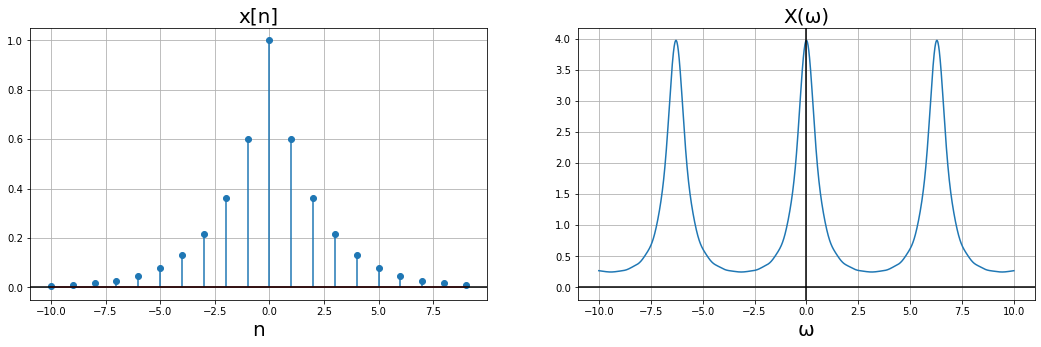

In [43]:
fig, axes = plt.subplots(1,2,figsize=(18,5))
a = 0.6
LL = -10
UL = 10

n = np.arange(LL,UL,1)
out = x_n(a,n)
axes[0].stem(n,out)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('x[n]',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()


omega = np.arange(LL,UL,0.01)
output = x_omega(a,LL,UL,omega)
output_abs = np.absolute(output)
axes[1].plot(omega,output_abs)
axes[1].set_xlabel('ω',fontsize=20)
axes[1].set_title('X(ω)',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].axvline(color = "Black");
axes[1].grid()

6. (a) Generate 3 sine waves with frequencies 2 Hz, 5 Hz, and 8 Hz, having amplitudes of 3, 2, and 1, respectively, and all phases as zeros. Add the 3 sine waves together with a sampling rate fs = 100 Hz. Plot the resultant signal for a time duration of 1 sec.

In [44]:
def sine(a,f,t):
    f = a*np.sin(2*np.pi*f*t)
    return f

In [45]:
t = np.arange(0,1,0.01)

In [46]:
a1 = 3
f1 = 2
x1 = sine(a1,f1,t)

In [47]:
a2 = 2
f2 = 5
x2 = sine(a2,f2,t)

In [48]:
a3 = 1
f3 = 8
x3 = sine(a3,f3,t)

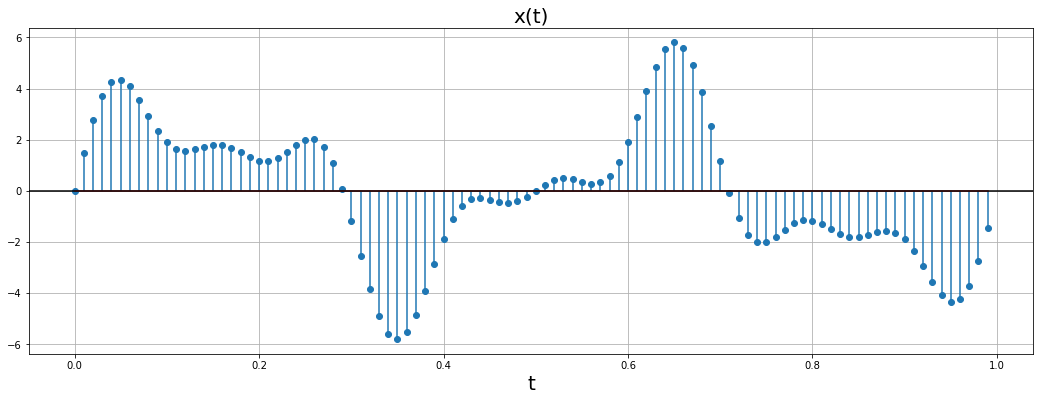

In [49]:
plt.subplots(figsize=(18,6))
x_1 = x1 + x2 + x3
plt.stem(t,x_1)
plt.xlabel('t',fontsize=20)
plt.title('x(t)',fontsize=20)
plt.axhline(color = "Black");
plt.grid()

(b) Write a function for discrete Fourier transform (DFT) as DFT(x) which takes in an input argument x, which is a 1-dimensional realvalued signal. The function has to calculate the DFT of the signal and return the DFT values. Apply this function to the signal generated in (a) and plot the result. Verify that the output of the DFT is symmetric.

In [50]:
def DFT(x):
    N = len(x)
    out = []
    for k in range(N):
        dft = 0
        for n in range(N):
            dft+=(x[n]*np.exp(-2j*np.pi*k*n/N))
        out.append(dft)
    return out

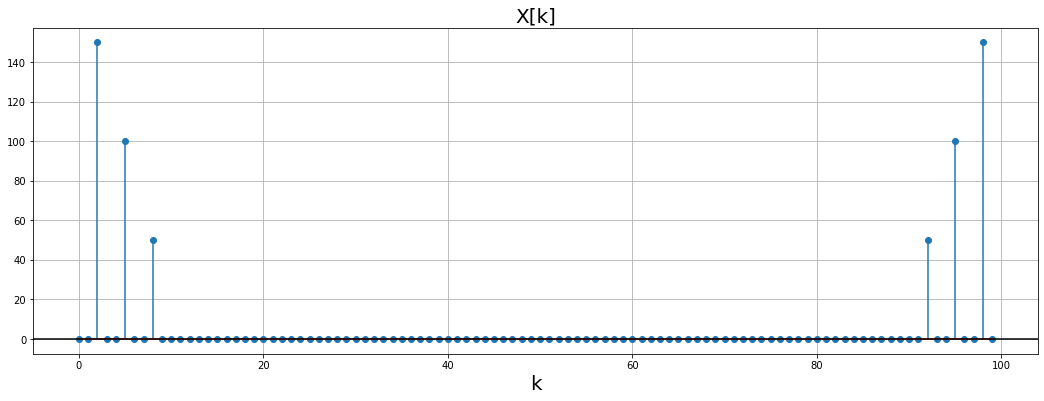

In [51]:
plt.subplots(figsize=(18,6))
y = DFT(x_1)
K = np.arange(0,len(y),1)
y_abs = np.absolute(y)
plt.stem(K,y_abs)
plt.xlabel('k',fontsize=20)
plt.title('X[k]',fontsize=20)
plt.axhline(color = "Black");
plt.grid()

(c) Filter out the DFT results to obtain only the frequency components of (a) and plot the resultant. That is, filter the frequency components which is greater than fs/2.

In [52]:
def Filter(x,fs):
    fill = [] 
    for i in range(len(x)):
        if i<=fs:
            fill.append(x[i])
    return fill

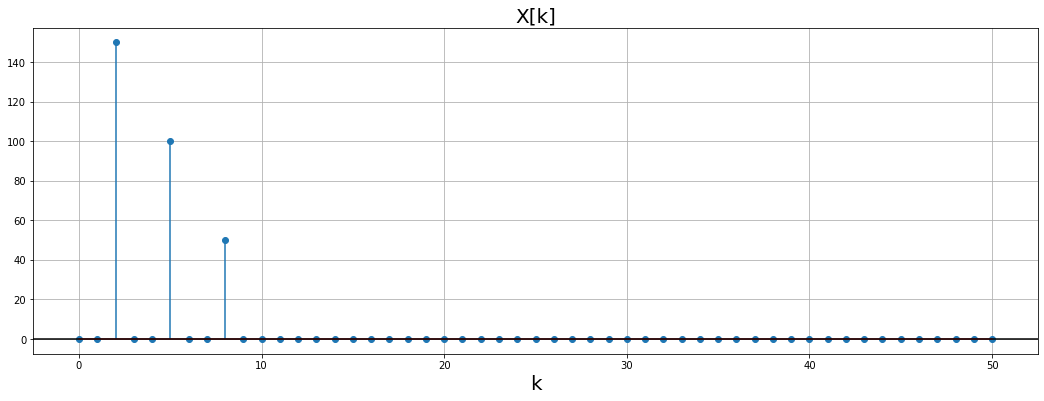

In [53]:
plt.subplots(figsize=(18,6))
output = Filter(y_abs,100/2)
K1 = np.arange(0,len(output),1)
plt.stem(K1,output)
plt.xlabel('k',fontsize=20)
plt.title('X[k]',fontsize=20)
plt.axhline(color = "Black");
plt.grid()

7. (a) Generate a sinewave of 100 Hz for 1 sec duration. Choose sampling rate, fs = 200 Hz.

In [54]:
def sine_1(a,f,n,fs):
    f = a*np.sin(2*np.pi*f*n/fs)
    return f

In [55]:
a = 1
f = 100
fs = 200
n = np.arange(0,1+(1/fs),1/fs)
s = sine_1(a,f,n,fs)

(b) Find its true spectrum.

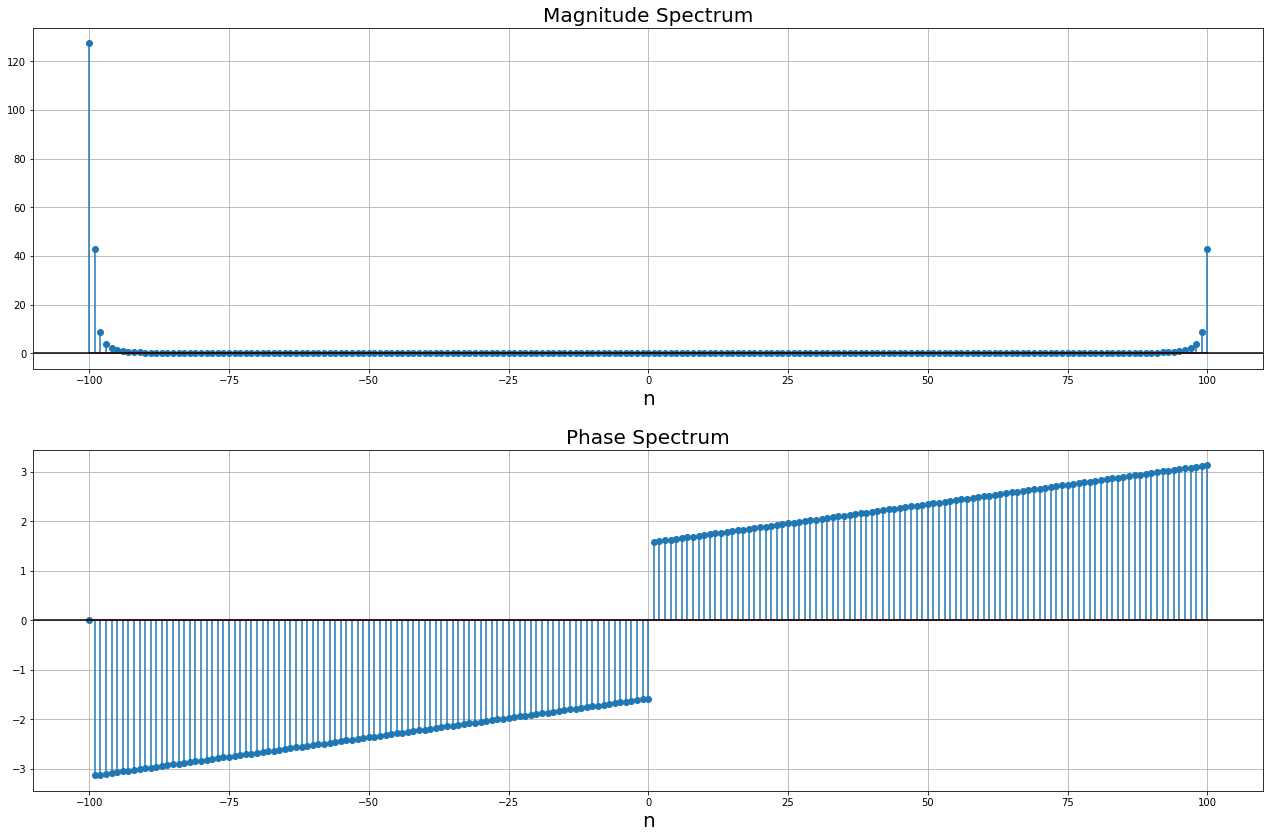

In [56]:
fig, axes = plt.subplots(2,1,figsize=(18,12))

n1 = np.arange(-100,101,1)
true_spectrum = np.fft.fft(s)
      
axes[0].stem(n1,np.absolute(true_spectrum))
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('Magnitude Spectrum',fontsize=20)
axes[0].axhline(color = "Black")
axes[0].grid()

axes[1].stem(n1,np.angle(true_spectrum))
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_title('Phase Spectrum',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].grid()

plt.tight_layout(pad=2)

(c) Generate rectangular windows of length 80 and 160 samples.

In [57]:
def window_seq(a,c,n,T):
    rect =[]
    for sample in n:
        if sample < c-T/2:
            rect.append(0)
        elif sample > c+T/2:
            rect.append(0)
        else:
            rect.append(a)
    return rect

(d) Plot the two window functions in time and frequency domains. Note down your observations about main lobe, side lobe, and other factors which you may observe.

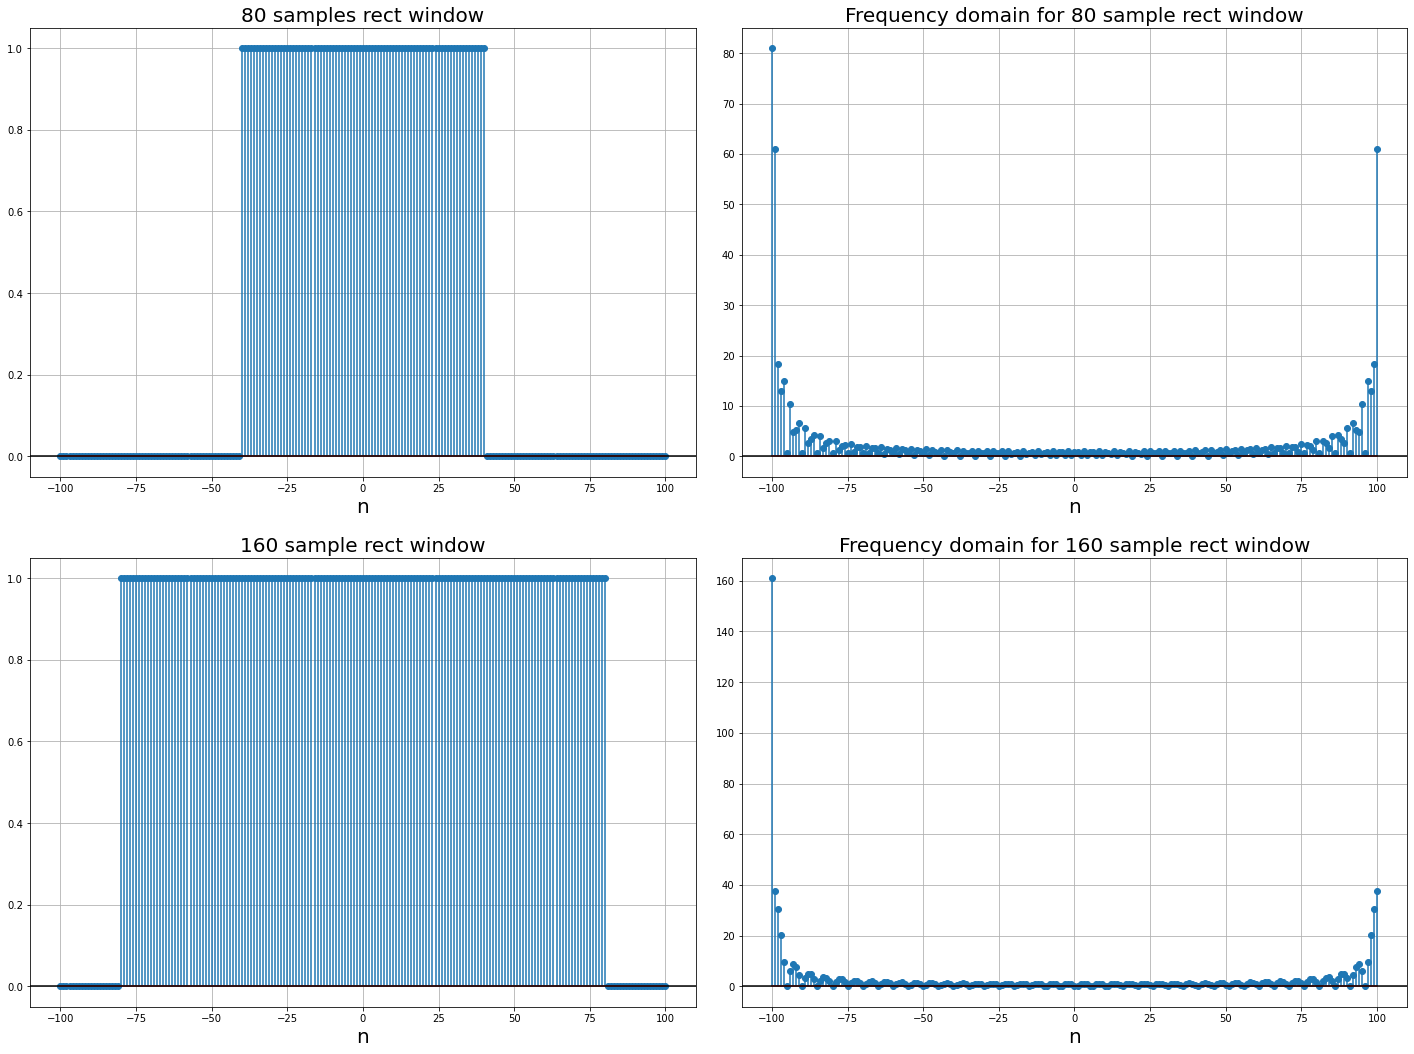

In [58]:
fig, axes =plt.subplots(2,2,figsize=(20,15)) 

a = 1
c = 0
T = 80
w1 = window_seq(a,c,n1,T)
axes[0,0].stem(n1,w1) 
axes[0,0].set_xlabel('n',fontsize=20)
axes[0,0].set_title('80 samples rect window',fontsize=20)
axes[0,0].axhline(color = "Black")
axes[0,0].grid()


w1_dtft = np.fft.fft(w1)
axes[0,1].stem(n1,np.absolute(w1_dtft))
axes[0,1].set_xlabel('n',fontsize=20)
axes[0,1].set_title('Frequency domain for 80 sample rect window',fontsize=20)
axes[0,1].axhline(color = "Black")
axes[0,1].grid()


a = 1
c = 0
T = 160
w2 = window_seq(a,c,n1,T)
axes[1,0].stem(n1,w2)
axes[1,0].set_xlabel('n',fontsize=20)
axes[1,0].set_title('160 sample rect window',fontsize=20)
axes[1,0].axhline(color = "Black")
axes[1,0].grid()


w2_dtft = np.fft.fft(w2)
axes[1,1].stem(n1,np.absolute(w2_dtft))
axes[1,1].set_xlabel('n',fontsize=20)
axes[1,1].set_title('Frequency domain for 160 sample rect window',fontsize=20)
axes[1,1].axhline(color = "Black")
axes[1,1].grid()

plt.tight_layout(pad=2)

(e) Multiply sinewave using rectangular window of duration 80 samples. Compute the DFT spectrum and note down your observation on obtained spectrum by comparing it with true spectrum in (b).

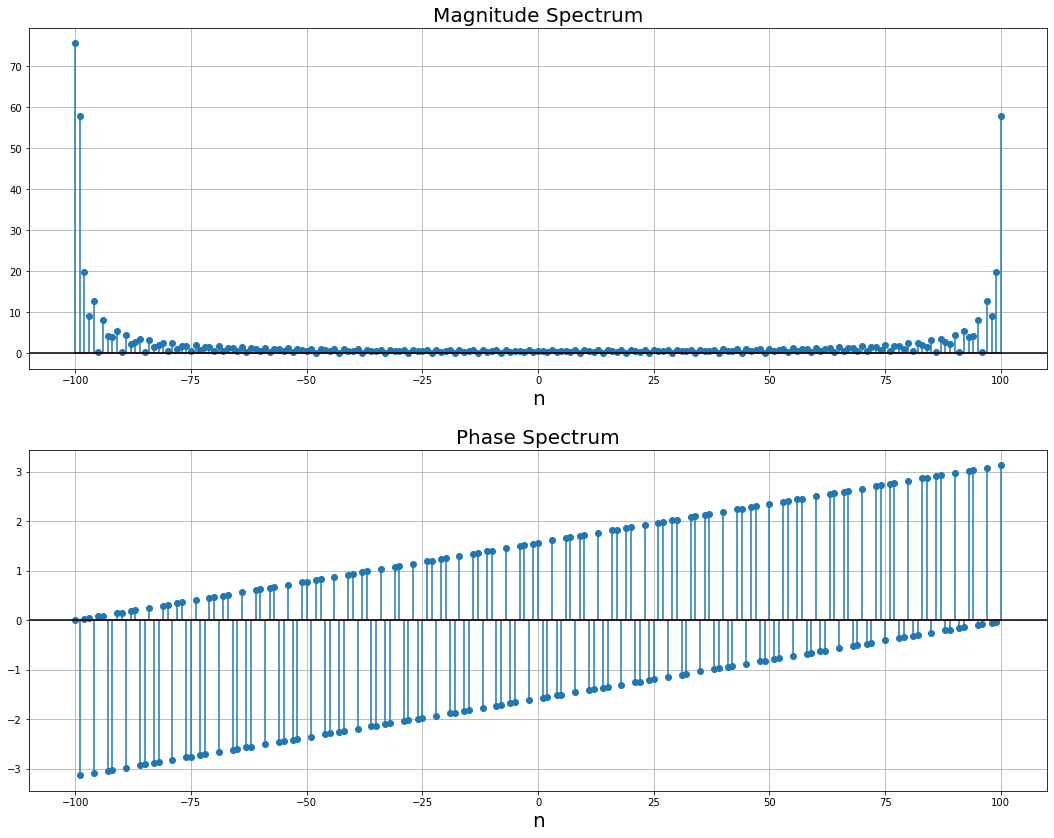

In [59]:
fig, axes = plt.subplots(2,1,figsize=(15,12))

m1 = s*w1

axes[0].stem(n1,np.absolute(np.fft.fft(m1))) 
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('Magnitude Spectrum',fontsize=20)
axes[0].axhline(color = "Black")
axes[0].grid()


axes[1].stem(n1,np.angle(np.fft.fft(m1))) 
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_title('Phase Spectrum',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].grid()

plt.tight_layout(pad=2)

(f) Multiply sinewave using rectangular window of duration 160 samples. Compute the DFT spectrum and note down your observation on obtained spectrum by comparing it with true spectrum in (b).

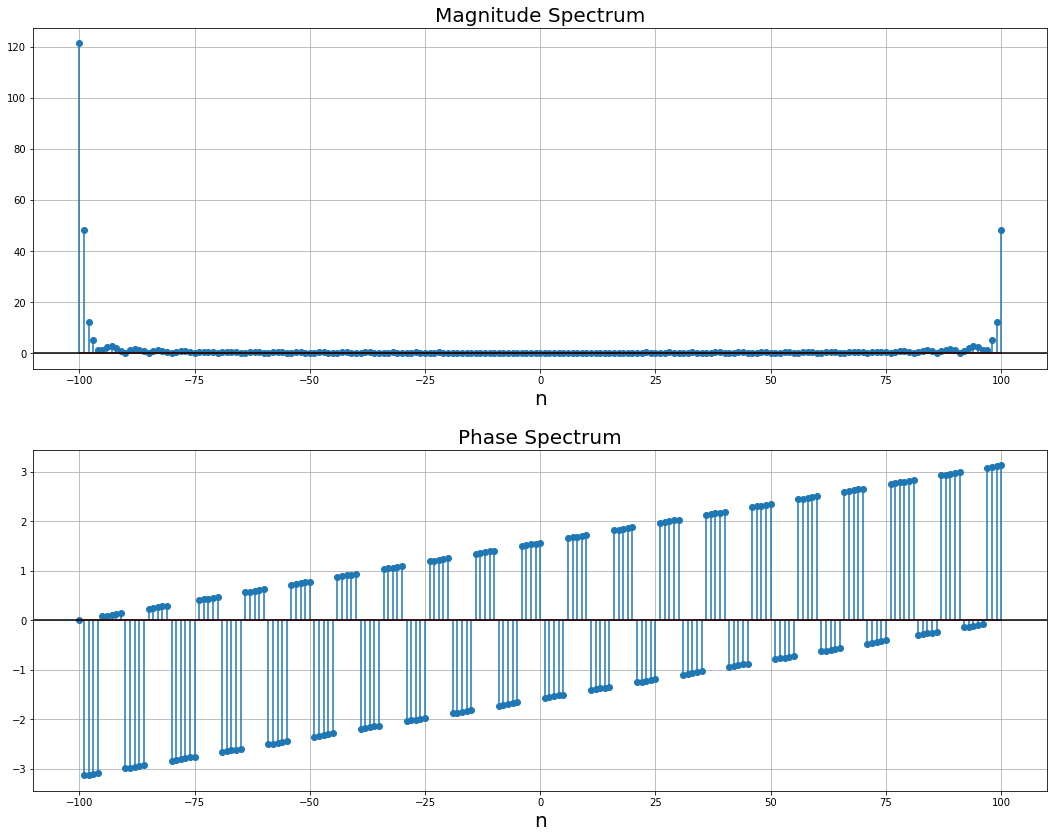

In [60]:
fig, axes = plt.subplots(2,1,figsize=(15,12))

m2 = s*w2

axes[0].stem(n1,np.absolute(np.fft.fft(m2))) 
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('Magnitude Spectrum',fontsize=20)
axes[0].axhline(color = "Black")
axes[0].grid()


axes[1].stem(n1,np.angle(np.fft.fft(m2))) 
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_title('Phase Spectrum',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].grid()


plt.tight_layout(pad=2)